# 4.3: Narrow Exploratory Analysis
Main Objective: In this section, we explored the normality of the positive and negative means as well as whether or not Barb Sander's dreams were more positive or negative. This was done via the one sample t-test.

## Preliminary and Setup Code

In [ ]:
# I needed to find out which directory colab was currently using on my computer

import os

os.getcwd()

'/content'

In [ ]:
# Import my google drive, so that I could access the files stored on it

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# I will be importing these packages as we will need them

import numpy as np
import pandas as pd;
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# This is me testing whether the file path works after mounting my google drive. Here is the dataframe for diary 1

path01 = 'data/diaries/diary01.csv'
df01 = pd.read_csv(path01, sep='|')
df01_scores = df01[['negative', 'neutral', 'positive', 'compound']]

display(df01_scores)

,negative,neutral,positive,compound
0,0.010,0.948,0.041,0.6486
1,0.041,0.906,0.053,-0.1941
2,0.076,0.856,0.069,-0.1573
3,0.098,0.829,0.073,-0.9523
4,0.040,0.889,0.071,0.9639
...,...,...,...,...
417,0.030,0.936,0.034,0.2508
418,0.022,0.840,0.138,0.9885
419,0.043,0.844,0.113,0.9866
420,0.064,0.891,0.045,-0.7947


In [ ]:
# Here, I am collecting the data frame for the fourth and fifth diaries from the Google Drive

path04 = 'data/diaries/diary04.csv'
df04 = pd.read_csv(path04, sep='|')

path05 = 'data/diaries/diary05.csv'
df05 = pd.read_csv(path05, sep = '|')

display(df04)
display(df05)

,Unnamed: 0,raw_number,content,negative,neutral,positive,compound
0,0,#0000 (1960-05-03),"I had the neatest dream about Blake, me, Reta ...",0.000,0.680,0.320,0.5719
1,1,#0001 (1960-05-04),I had another neat dream about Blake.,0.000,0.500,0.500,0.6124
2,2,#0002 (1960-07-16),I had a dream that Nate came back and I felt j...,0.000,0.875,0.125,0.3164
3,3,#0003 (1960-08-04),"For the second night in a row, I dreamed of Jo...",0.044,0.853,0.104,0.8513
4,4,#0004 (1960-12-02),I Didn't dream as last night before I woke up!...,0.079,0.730,0.191,0.5349
...,...,...,...,...,...,...,...
3109,3109,#3111 (1997-01-25),I am walking down a sidewalk and it is raining...,0.050,0.798,0.152,0.9977
3110,3110,#3112 (1997-01-25),Howard and I are at a beach. A high hill acros...,0.066,0.856,0.078,0.2926
3111,3111,#3113 (1997-01-25),We are having a serious meeting about the word...,0.040,0.779,0.181,0.9823
3112,3112,#3114 (1997-01-28),I am trying to become a doctor. The test is to...,0.076,0.853,0.070,-0.6318


,Unnamed: 0,raw_number,content,negative,neutral,positive,compound
0,0,#3116 (1997-02-01),"[""I have the big gun.""] I am on a beach. There...",0.093,0.844,0.063,-0.9129
1,1,#3117 (1997-02-05),"[""Cute puppy/man.""] A cute puppy is playfully ...",0.053,0.549,0.398,0.9432
2,2,#3118 (1997-02-06),"[""Packing the clothes.""] I am in a bedroom. Ch...",0.020,0.879,0.101,0.8748
3,3,#3119 (1997-02-09),"[""Huge waves and violent man.""] I am going to ...",0.084,0.839,0.077,-0.4631
4,4,#3120 (1997-02-10),"[""Doing the right thing.""] I am in an open are...",0.037,0.830,0.133,0.9822
...,...,...,...,...,...,...,...
1133,1133,#4249 (2001-12-11),"[""Dream workshop.""] I am attending a dream wor...",0.089,0.791,0.120,0.8167
1134,1134,#4250 (2001-12-12),"[""I am Dad's bridesmaid.""] I am involved with ...",0.057,0.888,0.055,-0.0772
1135,1135,#4251 (2001-12-13),"[""Lila the camel.""] I am riding a two humped c...",0.066,0.914,0.020,-0.6249
1136,1136,#4252 (2001-12-13),"[""Dress size too large.""] I am in a store. The...",0.037,0.910,0.053,0.5286


In [ ]:
# Now, I will index the dataframes from diaries 4 and 5 to only show the positive, negative, neutral, and compound scores

df_scores04 = df04[['negative', 'neutral', 'positive', 'compound']]
display(df_scores04)

df_scores05 = df05[['negative', 'neutral', 'positive', 'compound']]
display(df_scores05)

,negative,neutral,positive,compound
0,0.000,0.680,0.320,0.5719
1,0.000,0.500,0.500,0.6124
2,0.000,0.875,0.125,0.3164
3,0.044,0.853,0.104,0.8513
4,0.079,0.730,0.191,0.5349
...,...,...,...,...
3109,0.050,0.798,0.152,0.9977
3110,0.066,0.856,0.078,0.2926
3111,0.040,0.779,0.181,0.9823
3112,0.076,0.853,0.070,-0.6318


,negative,neutral,positive,compound
0,0.093,0.844,0.063,-0.9129
1,0.053,0.549,0.398,0.9432
2,0.020,0.879,0.101,0.8748
3,0.084,0.839,0.077,-0.4631
4,0.037,0.830,0.133,0.9822
...,...,...,...,...
1133,0.089,0.791,0.120,0.8167
1134,0.057,0.888,0.055,-0.0772
1135,0.066,0.914,0.020,-0.6249
1136,0.037,0.910,0.053,0.5286


## Positive Summary

In this section, I will show how the mean values in our positive_summary.csv are normally distributed and proceed to run some 1 sample t-tests on them to determine whether or not the participant Barb Sander's has statistically more positive or negative dreams. Then, I will explain what the results of these 1 sample t-tests actually mean.

In [ ]:
# Import the positive_summary csv.

path_positive = 'data/positive_summary.csv'

df_positive = pd.read_csv(path_positive, sep = ',')
display(df_positive)

,diary,count,mean,std,min,25%,50%,75%,max
0,1,422.0,0.078336,0.035076,0.0,0.0550,0.0750,0.09800,0.272
1,2,48.0,0.071042,0.035468,0.0,0.0485,0.0720,0.08925,0.146
2,3,212.0,0.057104,0.045721,0.0,0.0220,0.0500,0.08425,0.216
3,4,3114.0,0.097733,0.071887,0.0,0.0550,0.0870,0.12900,1.000
4,5,1138.0,0.098941,0.064120,0.0,0.0550,0.0875,0.13400,0.448
...,...,...,...,...,...,...,...,...,...
89,90,98.0,0.071398,0.050612,0.0,0.0385,0.0620,0.09375,0.243
90,91,32.0,0.075000,0.056697,0.0,0.0370,0.0720,0.10100,0.213
91,92,463.0,0.079492,0.054269,0.0,0.0415,0.0700,0.10400,0.322
92,93,65.0,0.084508,0.065456,0.0,0.0450,0.0760,0.10600,0.292


In [ ]:
# Isolate the mean values of the positive summary csv file

df_meanpos_total = df_positive['mean']
display(df_meanpos_total)

0     0.078336
1     0.071042
2     0.057104
3     0.097733
4     0.098941
        ...   
89    0.071398
90    0.075000
91    0.079492
92    0.084508
93    0.095562
Name: mean, Length: 94, dtype: float64

Now, we run a t-test on the mean data for each of our diaries and run a two-sided t-test for the 4th diary. In this case $H_0: \mu_0 = 0.097733$ versus $H_a: \mu \neq 0.097733$. Here, I am assuming $X_1,\dots, X_n \sim N(\mu, \sigma^2)$, where $X_1, \dots, X_n$ are the sample means of the diary entries for each person who entered a diary. From there, I will be runninng a one sample t-test on Barbara, whose dreams are encapsulated in the fourth and fifth diary. Here, the level of significance is $\alpha = 0.05$

In [ ]:
# Here is the 1 sample t-test. We will assume normality and show later on that it is normal. This is the mean of the fourth diary

print(df_meanpos_total[3], df_meanpos_total[4])

display(stats.ttest_1samp(df_meanpos_total, df_meanpos_total[3], alternative = 'two-sided'))
display(stats.ttest_1samp(df_meanpos_total, df_meanpos_total[3], alternative = 'less'))

0.097732819524727 0.0989411247803163


TtestResult(statistic=-11.534821873717556, pvalue=1.2366389485438801e-19, df=93)

TtestResult(statistic=-11.534821873717556, pvalue=6.183194742719401e-20, df=93)

Therefore, we can say that for $H_0: \mu_0 = 0.097732819524727$ versus $H_1: \mu \leq 0.097732819524727$, we reject $H_0$ in favor of $H_1$ for diary entry 4 with significance $\alpha = 0.05$

In [ ]:
# This is the 1 sample t-test of the fifth diary. Once again, we assume normality that we will show later on

print(df_meanpos_total[3], df_meanpos_total[4])

display(stats.ttest_1samp(df_meanpos_total, df_meanpos_total[4], alternative = 'two-sided'))
display(stats.ttest_1samp(df_meanpos_total, df_meanpos_total[4], alternative = 'less'))

0.097732819524727 0.0989411247803163


TtestResult(statistic=-11.534821873717556, pvalue=1.2366389485438801e-19, df=93)

TtestResult(statistic=-12.03272960743375, pvalue=5.782116194848682e-21, df=93)

Therefore, we can say that for $H_0: \mu_0 = 0.09894112478$ versus $H_1: \mu \leq 0.09894112478$, we reject $H_0$ in favor of $H_1$ for diary entry 5. We can conclude, at $\alpha = 0.05$ significance that the fifth and fourth diary entries for Barbara overall were greater than the overall true population parameter $\mu$

In [ ]:
# With these two lines, I got the sample standard deviation and the sample mean of our data frame

mu, sigma = df_meanpos_total.mean(), df_meanpos_total.std()

mu, sigma

(0.06974051302192463, 0.023528363399429788)

## Was our assumption that the means of the positive scores of the diary entries are normally distributed, correct?

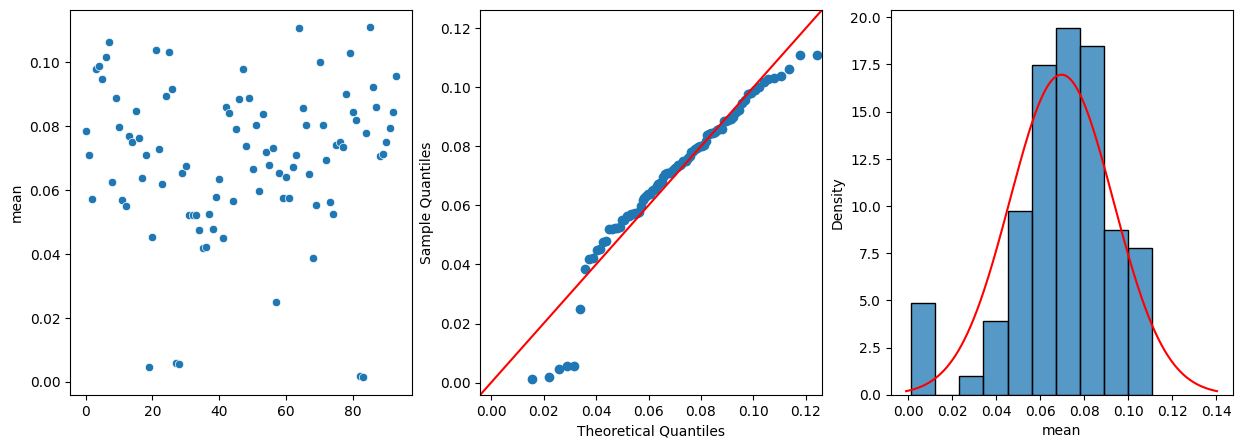

In [ ]:
# Here is the code that shows our mean values of each diary entry are normally distributed, which is what we assumed when we ran our t-tests.

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_meanpos_total, ax = ax[2], stat='density')
ax[2].plot(x, y, color = 'red')

sm.qqplot(df_meanpos_total, stats.norm(mu, sigma), line = '45', ax=ax[1])
sns.scatterplot(df_meanpos_total, ax=ax[0])

plt.show()

In [ ]:
# We can also check using the Shapiro-Wilks Test

normal1 = df_meanpos_total
normality1 = stats.shapiro(normal1)
print(normality1)

ShapiroResult(statistic=0.9341558218002319, pvalue=0.0001421040069544688)


Here, we see that the data is not normally distributed, but the figures we have above paint a slightly different picture. In order to simplify our analysis, we believed it was best to assume that the positive summary csv mean values were normally distributed.

In [ ]:
# sns.histplot(df_meanpos_total, x = 'mean')

mu, sigma = df_meanpos_total.mean(), df_meanpos_total.std()

mu, sigma

(0.06974051302192463, 0.023528363399429788)

## Negative Summary

In this section, I will show that the means of our negative values of our package VADER are normally distributed. Then, I will run some t-tests and make some conclusions similar to the positive summary portion of my analysis above.

In [ ]:
# Import the negative_summary csv.

path_negative = 'data/negative_summary.csv'

df_negative = pd.read_csv(path_negative, sep = ',')
display(df_negative)

,diary,count,mean,std,min,25%,50%,75%,max
0,1,422.0,0.051294,0.031847,0.0,0.03100,0.0460,0.06675,0.264
1,2,48.0,0.053437,0.028005,0.0,0.03175,0.0515,0.07925,0.114
2,3,212.0,0.065892,0.054758,0.0,0.02900,0.0580,0.09500,0.269
3,4,3114.0,0.070487,0.065115,0.0,0.03100,0.0580,0.09300,0.737
4,5,1138.0,0.069237,0.061152,0.0,0.02900,0.0560,0.09375,0.608
...,...,...,...,...,...,...,...,...,...
89,90,98.0,0.118663,0.064137,0.0,0.07125,0.1135,0.14800,0.342
90,91,32.0,0.069187,0.044550,0.0,0.03100,0.0640,0.10625,0.160
91,92,463.0,0.069942,0.053580,0.0,0.03150,0.0620,0.09550,0.366
92,93,65.0,0.049538,0.050925,0.0,0.01500,0.0410,0.06000,0.304


In [ ]:
# Isolate the mean values of the negative summary csv file

df_meanneg_total = df_negative['mean']
display(df_meanneg_total)

0     0.051294
1     0.053437
2     0.065892
3     0.070487
4     0.069237
        ...   
89    0.118663
90    0.069187
91    0.069942
92    0.049538
93    0.061393
Name: mean, Length: 94, dtype: float64

Now, we run a one-sample t-test on the mean data for each of the negative valence scores in the fourth and fifth diaries. This will tell us whether or not Barb Sander experienced unusally negative dreams compared to the rest of the data. In this case, $H_0: \mu_0 = 0.070487$ and $H_1: \mu \neq 0.069237$. I am assuming $X_1, X_2, \dots, X_n \sim N(\mu, \sigma^2)$, where $X_1, X_2, \dots, X_n$ represent the means of the negative valence scores from each person who made a diary entry. Likewise, the level of significance is $\alpha = 0.05$

In [ ]:
# This is the one-sample t-test for the fourth diary entry

print(df_meanneg_total[3], df_meanneg_total[4])

display(stats.ttest_1samp(df_meanneg_total, df_meanneg_total[3], alternative = 'two-sided'))
display(stats.ttest_1samp(df_meanneg_total, df_meanneg_total[3], alternative = 'less'))

0.0704865125240847 0.0692372583479789


TtestResult(statistic=-6.245822178274146, pvalue=1.2506630560282581e-08, df=93)

TtestResult(statistic=-6.245822178274146, pvalue=6.2533152801412904e-09, df=93)

Therefore, we can say that for $H_0: \mu_0 = 0.0704865$ versus $H_1: \mu \leq 0.0704865$. We reject $H_0$ in favor of $H_1$ for diary entry 4 with significance $\alpha = 0.05$

In [ ]:
# This is the one-sample t-test for the fifth diary entry.

display(stats.ttest_1samp(df_meanneg_total, df_meanneg_total[4], alternative = 'two-sided'))
display(stats.ttest_1samp(df_meanneg_total, df_meanneg_total[4], alternative = 'less'))

TtestResult(statistic=-5.5626787492111625, pvalue=2.5387341095277396e-07, df=93)

TtestResult(statistic=-5.5626787492111625, pvalue=1.2693670547638698e-07, df=93)

Therefore, we can conclude $H_0: \mu_0 = 0.074865$ versus $H_1: \mu \leq 0.074865$ for diary entry 5. We can conclude at signficance level $\alpha = 0.05$ that the fourth and fifth entries for Barb Sander overall were less than the overall true population parameter $\mu$

In [ ]:
# I will also grab the sample standard deviation and mean

mu1, sigma1 = df_meanneg_total.mean(), df_meanneg_total.std()

mu1, sigma1

(0.059064870878309965, 0.017729759370174424)

In [ ]:
sigma, sigma1

(0.017729759370174424, 0.017729759370174424)

## Are the negative summary means normally distributed?

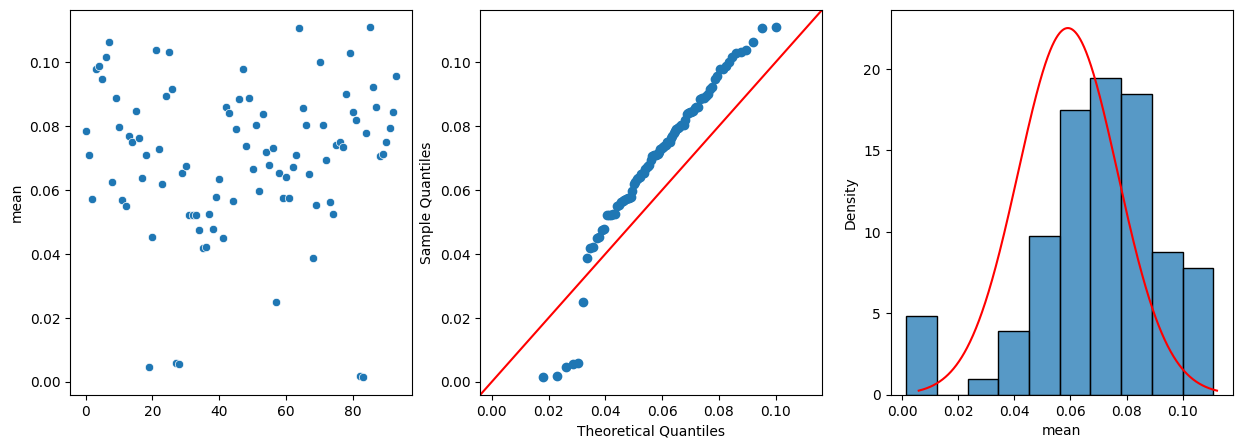

In [ ]:
# Here is the code that shows our mean values of each diary entry are normally distributed, which is what we assumed when we ran our t-tests.

x = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 1000)
y = stats.norm.pdf(x, mu1, sigma1)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_meanpos_total, ax = ax[2], stat='density')
ax[2].plot(x, y, color = 'red')

sm.qqplot(df_meanpos_total, stats.norm(mu, sigma), line = '45', ax=ax[1])
sns.scatterplot(df_meanpos_total, ax=ax[0])

plt.show()